In [1]:
# common imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, cv
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics

# display setup
plt.style.use('seaborn') # for plots
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Preface
* Fashion-MNIST is a dataset containing 70,000 samples, 60,000 for the training set and 10,000 for the test set.
* Each sample is a 28x28 (784 pixels) grayscale image of a certain fashion item.
* The data contains a column with 10 labels, making this a **multiclass classification** problem.
In other words, this is a **supervised learning** task.
* The model will be trained using all available data and run without learning anymore. This method is named **offline/batch learning**.
* Main objective: Find the best algorithm and model parameters that classify the unused images correctly.

# 1. Getting the Data

In [2]:
# read the csv file
train_set = pd.read_csv(r"FMNIST/fashion-mnist_train.csv")
test_set = pd.read_csv(r"FMNIST/fashion-mnist_test.csv")

In [3]:
# display the first 5 rows for a quick look
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# display the last 5 rows for a quick look
train_set.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# DataFrame shape (rows, columns)
print("Training Set:", train_set.shape)
print("Test Set:", test_set.shape)

Training Set: (60000, 785)
Test Set: (10000, 785)


In [6]:
# description of data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
# summary of the numerical attributes
# null values are ignored
train_set.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
# maximum pixel value
train_set.describe().loc['max'].max()

255.0

In [9]:
# minimum pixel value
train_set.describe().loc['min'].max()

0.0

> ### Features in the DataFrame:
> There are 785 columns, one for the labels and 784 for the pixels (one for each pixel).
>> Labels:
> - 0 = T-shirt/top
> - 1 = Trouser
> - 2 = Pullover
> - 3 = Dress
> - 4 = Coat
> - 5 = Sandal
> - 6 = Shirt
> - 7 = Sneaker
> - 8 = Bag
> - 9 = Ankle boot

In [10]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# number of instances for each category
train_set["label"].value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

> Initial observations:
>> 1. Each category has an equal amount of samples in the training set.
2. Classes and pixel values are integers.
3. The pixel range is [0, 255]. Some feature columns have a smaller maximum value or a
greater minimum value. This means that the range is reduced for all training instances in
that specific feature, in this case being a pixel value.

# 2. Understanding and Visualizing the Data
> ##### *The motivation for this section is to gain more insights.*

The data was split in advance and the images are already the same size.
Let's create a copy of the data to prevent accidentally harming the training set.

In [11]:
# deep copy of the training set
fmnist = train_set.copy()

In [12]:
# DataFrame shape (rows, columns)
# understand the amount of data we are working with
fmnist.shape

(60000, 785)

In [13]:
# check for missing values
np.isnan(fmnist.values).sum()

0

> #### Observations:
>> * There are no missing values in the training set.

> ### Exploring Colors of Sample Image

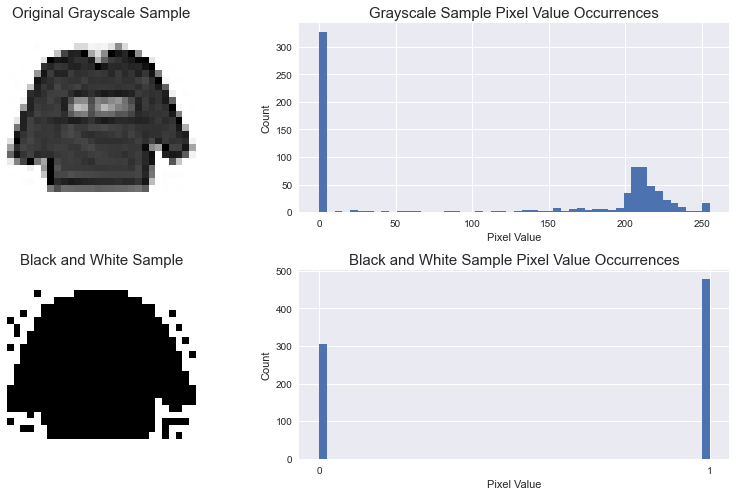

In [14]:
# sample image
some_sample = fmnist.drop('label', axis=1).iloc[0] # get sample
some_sample = np.array(some_sample) # convert to array
some_sample_img = some_sample.reshape(28,28) # reshape array

# convert sample image from grayscale to black and white
# in the fashion mnist dataset white pixels are 0 and black pixels are 255
# the images are grayscale, so values (0,255) are different intensities of gray
some_sample_bin = some_sample.copy() # deep copy of the sample image
some_sample_bin[some_sample_bin>0] = 1 # convert gray intensities to black
some_sample_bin_img = some_sample_bin.reshape(28,28) # reshape array

fig, dx = plt.subplots(2,2, figsize=(12, 7))

# plot grayscale sample image and pixel value occurrences
dx[0,0].imshow(some_sample_img)
dx[0,0].axis('off')
dx[0,0].set_title("Original Grayscale Sample", size= 15)
dx[0,1].hist(some_sample, bins=50)
dx[0,1].set_title("Grayscale Sample Pixel Value Occurrences", size= 15)
dx[0,1].set_xlabel("Pixel Value")
dx[0,1].set_ylabel("Count")
# plot black and white sample image and pixel value occurrences
dx[1,0].imshow(some_sample_bin_img)
dx[1,0].axis('off')
dx[1,0].set_title("Black and White Sample", size= 15)
dx[1,1].hist(some_sample_bin, bins=50)
dx[1,1].set_title("Black and White Sample Pixel Value Occurrences", size= 15)
dx[1,1].set_xticks([0,1])
dx[1,1].set_xlabel("Pixel Value")
dx[1,1].set_ylabel("Count")
plt.tight_layout()
plt.show()

> #### Observations:
>> * The most common pixel value in the original grayscale sample is white (0) and in the binary
> sample is black (1).
* Aside from a few pixels that are detached from the clothing, the item resembles the original grayscale shape.
* Transforming the data from grayscale to black and white should be further evaluated during model training.
There is a possibly it could improve the result.

> ### Class Comparison

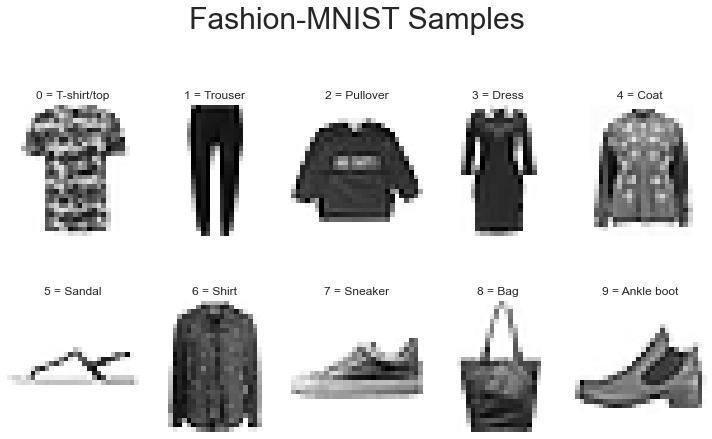

In [15]:
# plot image for each category

# use of a dictionary to easily add subplot titles
label_dict = {0:"0 = T-shirt/top", 1:"1 = Trouser", 2:"2 = Pullover", 3:"3 = Dress", 4:"4 = Coat",
              5:"5 = Sandal", 6:"6 = Shirt", 7:"7 = Sneaker", 8:"8 = Bag", 9:"9 = Ankle boot"}

fig = plt.figure(figsize=(10,7))
rows = 2
columns = 5
# use groupby to locate an instance for each label
label_groups = fmnist.groupby('label')
# add image in each iteration
for i in range(rows*columns):
    curr = label_groups.get_group(i)[:1] # get group
    curr_img = curr.drop('label', axis = 1).to_numpy().reshape(28,28) # convert to reshaped array
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(curr_img)
    plt.axis('off') # remove grid
    plt.title(label_dict[i]) # use dictionary to add subplot title

fig.suptitle("Fashion-MNIST Samples", size=30)
plt.tight_layout()
plt.show()

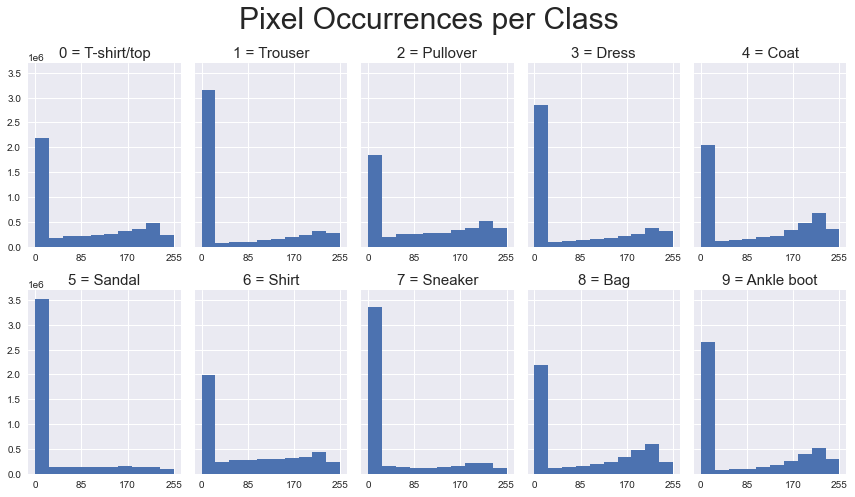

In [16]:
# plot pixel value occurrences for each class

fig, dx = plt.subplots(2,5, figsize=(12, 7), sharey='all')
i = 0 # current group label
mean_values = []
plt.setp(dx, xticks=np.arange(0, 256, step=85)) # set x axis values

for row in range(2):
    for col in range(5):
        pixels = np.array(label_groups.get_group(i).drop(['label'], axis=1)) # get group and convert to array
        mean_values.append(pixels.mean()) # calculate mean pixel value and add to list (for next plot)
        dx[row,col].hist(pixels.reshape(-1)) # add histogram in each iteration, -1 reshapes to length of array
        dx[row,col].set_title(label_dict[i], size=15) # use dictionary to add subplot title
        i = i + 1 # next group

fig.suptitle("Pixel Occurrences per Class", size=30)
plt.tight_layout()
plt.show()

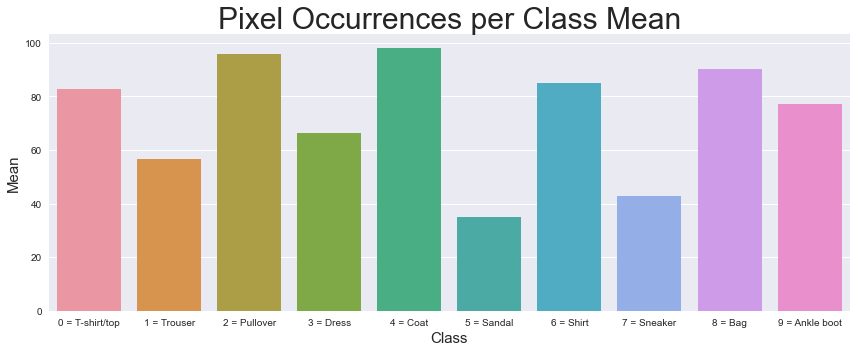

In [17]:
# plot mean values calculated in previous cell
plt.figure(figsize=(12, 5))
sns.barplot(x=np.arange(10), y=mean_values) # x axis for classes, y axis for mean values
plt.xticks(np.arange(10), labels=label_dict.values()) # use dictionary to set x axis values
plt.xlabel("Class", size=15)
plt.ylabel("Mean", size=15)
plt.title("Pixel Occurrences per Class Mean", size=30)
plt.tight_layout()
plt.show()

> #### Observations:
>> * All classes have a majority of white pixel values (0), with the remaining scattered in the rest of the range.
* Aside from the white pixel value, quite a few of the histograms displaying pixel occurrences per class look like
they have a somewhat normal distribution. They are tail-heavy, extending farther to the left of the
median.
* Any shoe type (classes 5, 7, 9) have the most white pixels, with sandal (class 5) containing the most.
This is emphasized most in the pixel occurrences mean plot.
* Coats (class 4) and pullovers (class 2) have the highest pixel mean. When looking at the sample
images per class it is noticeable that they spread across most of the diagram.
* The t-shirt/top (class 0) and shirt (class 6) have extremely similar pixel occurrences.
Had the class labels been removed, the graphs would be indistinguishable. It is likely that
the models will make mistakes when predicting instances from these two classes.

> ### Analyze and Compare Sample Images of T-shirt/top and Shirt Classes

In [18]:
# t-shirt/top sample image (class 0)
top = label_groups.get_group(0).drop('label', axis=1).iloc[0] # get t-shirt/top sample
top = np.array(top) # convert to array
top_img = top.reshape(28,28) # reshape array

# convert t-shirt/top sample image from grayscale to black and white
top_bin = top.copy() # deep copy of the t-shirt/top sample image
top_bin[top_bin>0] = 1 # convert gray intensities to black
top_bin_img = top_bin.reshape(28,28) # reshape array

# shirt sample image (class 6)
shirt = label_groups.get_group(6).drop('label', axis=1).iloc[0] # get t-shirt/top sample
shirt = np.array(shirt) # convert to array
shirt_img = shirt.reshape(28,28) # reshape array

# convert shirt sample image from grayscale to black and white
shirt_bin = shirt.copy() # deep copy of the shirt sample image
shirt_bin[shirt_bin>0] = 1 # convert gray intensities to black
shirt_bin_img = shirt_bin.reshape(28,28) # reshape array

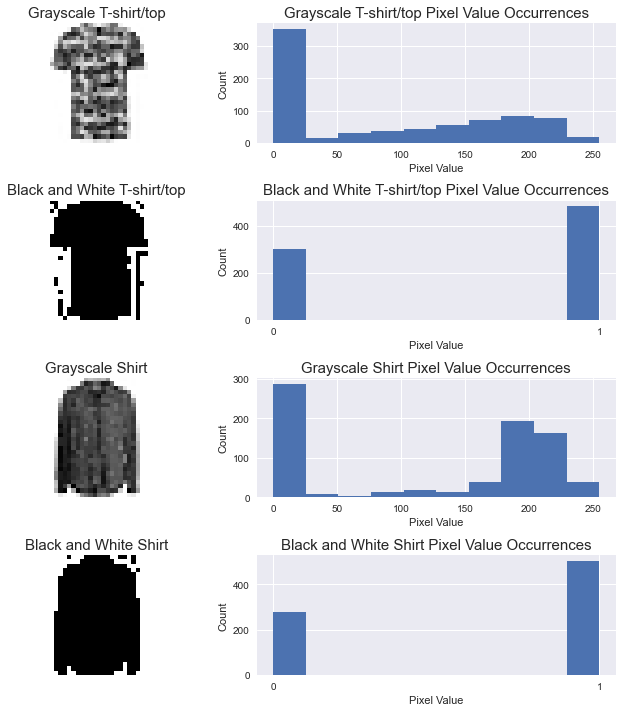

In [19]:
fig, dx = plt.subplots(4,2, figsize=(10, 10))

# plot grayscale t-shirt/top sample image and pixel value occurrences
dx[0,0].imshow(top_img)
dx[0,0].axis('off')
dx[0,0].set_title("Grayscale T-shirt/top", size= 15)
dx[0,1].hist(top)
dx[0,1].set_title("Grayscale T-shirt/top Pixel Value Occurrences", size= 15)
dx[0,1].set_xlabel("Pixel Value")
dx[0,1].set_ylabel("Count")
# plot black and white t-shirt/top sample image and pixel value occurrences
dx[1,0].imshow(top_bin_img)
dx[1,0].axis('off')
dx[1,0].set_title("Black and White T-shirt/top", size= 15)
dx[1,1].hist(top_bin)
dx[1,1].set_title("Black and White T-shirt/top Pixel Value Occurrences", size= 15)
dx[1,1].set_xticks([0,1])
dx[1,1].set_xlabel("Pixel Value")
dx[1,1].set_ylabel("Count")

# plot grayscale shirt sample image and pixel value occurrences
dx[2,0].imshow(shirt_img)
dx[2,0].axis('off')
dx[2,0].set_title("Grayscale Shirt", size= 15)
dx[2,1].hist(shirt)
dx[2,1].set_title("Grayscale Shirt Pixel Value Occurrences", size= 15)
dx[2,1].set_xlabel("Pixel Value")
dx[2,1].set_ylabel("Count")
# plot black and white shirt sample image and pixel value occurrences
dx[3,0].imshow(shirt_bin_img)
dx[3,0].axis('off')
dx[3,0].set_title("Black and White Shirt", size= 15)
dx[3,1].hist(shirt_bin)
dx[3,1].set_title("Black and White Shirt Pixel Value Occurrences", size= 15)
dx[3,1].set_xticks([0,1])
dx[3,1].set_xlabel("Pixel Value")
dx[3,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

> #### Observations:
>> * The main difference between the classes are the pixels representing the sleeves.
> The t-shirt/top has short sleeves and the shirt has long sleeves.
* Converting the images to binary shows where the mix-up between the classes might be.
The t-shirt has gray pixels that aren't seen in the grayscale image, but stand out in the
black and white image. The unseen gray pixels appear where the long sleeves would be
had this been a shirt.
* The pixel value occurrences are similar when comparing the black and white images and are
spread out differently in the grayscale images.

# 3. Data Cleaning

In [20]:
# clean copy of the training set
df = train_set.copy()

In [21]:
# separate features from target values

# drop- creates a copy without changing the training set
X_train = df.drop('label', axis=1)

# create a deep copy of the target values
y_train = df['label'].copy()

> ### Custom Transformer:
> In section 2, I evaluated samples in grayscale and in black and white.
> I assumed that converting images to black and white could improve the ML algorithms.
>
> The following custom transformer automates this process on the entire dataset:
>
>> The ColorConverter transformer contains the hyperparameter "is_binary". It is
> set by default to 'False', meaning the samples remain in the original grayscale format.
> However, the hyperparameter can be set to 'True' which will convert the images to black
> and white.
>>
>> Adding this transformer will allow to easily switch between the two options during
> model training, and determine which one is better.

In [22]:
# custom transformer for converting images to black and white
# default is set to leave as original grayscale images
# when is_binary hyperparameter is set to True data is converted to binary

# BaseEstimator for enabling hyperparameters
# TransformerMixin adds fit_transform method
class ColorConverter(BaseEstimator, TransformerMixin):

    def __init__(self, is_binary = False):
        self.is_binary = is_binary

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.is_binary:
            X_binary = X.copy()
            X_binary[X_binary>0] = 1
            return X_binary
        else:
            return X

clr_gray = ColorConverter()
clr_binary = ColorConverter(is_binary = True)

X_train_gray = clr_gray.transform(X_train.values)

X_train_bin = clr_binary.transform(X_train.values)

plt.imshow(X_train_bin[0].reshape(28,28))

plt.imshow(X_train_gray[0].reshape(28,28))

> ### Feature Scaling

Although the pixel values are in a known range [0,255], scaling the data can make a crucial difference
(especially if the learning algorithm relies on calculating distances).

> Why is this important?
* Models can't differentiate feature importance the same way humans can.
A training algorithm may assume that a feature containing large numbers is more important than features
with smaller numbers- which might not be the case.
* Some algorithms converge much faster when features are scaled (i.e. Gradient Descent).
* There are ML algorithms that make assumptions on the data (i.e. PCA assumes the data is centered around
the origin).
>

Chosen feature scale:

Standardizing centers the data so that it has a zero mean and a standard deviation of 1, under the assumption
that the data is normally distributed.

* The distribution is relatively normal (aside from the white pixels which is highest in all classes).
* Using PCA could be useful since the dataset has a large amount of features. As previously stated,
PCA assumes the data has zero mean.

Therefore, standard scaling is the ideal option.

In [23]:
# create transformation pipeline

# How to change ColorConverter is_binary hyperparameter:
# full_pipeline['clr_convert'].__setattr__('is_binary', True)


full_pipeline = Pipeline([
    ('clr_convert', ColorConverter()),
    ('std_scaler', StandardScaler()),
])

In [24]:
# transform training data using pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)

# transform training data without fit for testing
X_tr_testing = full_pipeline.transform(X_train)

full_pipeline['clr_convert'].__setattr__('is_binary', True)

full_pipeline.steps[0]

# 4. Training and Evaluating Models

> The number of instances for each class in the training set are equal which makes this
> a balanced classification task.
>
> Chosen evaluation metric:
>
> Accuracy works well with balanced classification tasks. It is also the most intuitive
> metric and is especially easier to understand when dealing with multiclass classification.

In [25]:
# function for evaluating cross validation scores and for easy model comparison
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

# function prints accuracy and errors
def display_evaluation(actual, pred):
    print("Accuracy:\n", metrics.accuracy_score(actual, pred), "\n")
    print("Display Errors in Confusion Matrix:\n")
    conf_mx = metrics.confusion_matrix(actual, pred)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.grid(False)
    plt.show()

### Shortlist Promising Models:
> Trying many models quickly and selecting the ones that show promising results.
>
>> How I plan to do this:
1. Train a baseline model and evaluate sample predictions.
**Continue to step 2 if the sample predictions were mostly correct.**
2. Use cross-validation and evaluate scores.
3. If the model has a significant hyperparameters, try changing it. Use cross-validation to
compare the results to step 2.


In [26]:
# a few instances from the training data for testing
some_data = X_train.iloc[:10]
some_labels = y_train.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

#### 1. Logistic Regression

In [27]:
log_reg = LogisticRegression(random_state=42, n_jobs=-1)

In [28]:
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [29]:
print("Predictions:", log_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 6 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [30]:
log_reg_scores = cross_val_score(log_reg, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [31]:
display_scores(log_reg_scores)

Scores: [0.8562 0.8508 0.8535 0.8499 0.8482 0.8501]
Mean: 0.8514499999999999
Standard Deviation: 0.002644963767867788


#### 2. KNN

In [32]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [33]:
knn_clf.fit(X_train_prepared, y_train)

KNeighborsClassifier(n_jobs=-1)

In [34]:
print("Predictions:", knn_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 4 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [35]:
knn_scores = cross_val_score(knn_clf, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [36]:
display_scores(knn_scores)

Scores: [0.8592 0.8537 0.853  0.857  0.8522 0.8528]
Mean: 0.85465
Standard Deviation: 0.0025584826232228556


The KNN model predicted all labels correctly so let's check the predictions on the entire dataset.

knn_pred = knn_clf.predict(X_tr_testing)

metrics.accuracy_score(y_train, knn_pred)

knn_scores = cross_val_score(knn_clf, X_train_prepared, y_train, scoring='accuracy', cv=6)

knn_scores

#### 3. Decision Tree Classifier

In [37]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [38]:
tree_clf.fit(X_train_prepared, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
print("Predictions:", tree_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 4 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [40]:
tree_scores = cross_val_score(tree_clf, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [41]:
display_scores(tree_scores)

Scores: [0.791  0.7946 0.7932 0.7989 0.7962 0.7939]
Mean: 0.7946333333333334
Standard Deviation: 0.0024648642063114915


#### 4. Random Forest Classifier

In [42]:
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [43]:
rf_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [44]:
print("Predictions:", rf_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 4 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [45]:
rf_scores = cross_val_score(rf_clf, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [46]:
display_scores(rf_scores)

Scores: [0.8844 0.8805 0.8854 0.8812 0.8776 0.8815]
Mean: 0.8817666666666666
Standard Deviation: 0.0025655841873191594


> ### Feature Importance:
> Random Forests automatically computes the importance of each feature after training
> and even scales them, making the total sum equal to 1.
> This provides a quick insight to which features really matter.

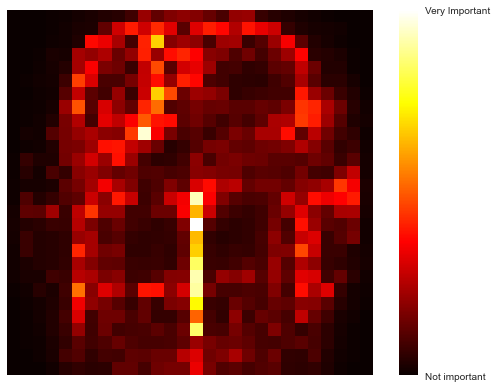

In [47]:
# plot random forest classifier feature importance
img = rf_clf.feature_importances_.reshape(28,28)
plt.imshow(img, cmap= plt.cm.hot, interpolation="nearest")
plt.axis('off')
cbar = plt.colorbar(ticks=[rf_clf.feature_importances_.min(), rf_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very Important'])
plt.tight_layout()
plt.show()

> ### Observations:
* The corners and left and right edges are least important. Dropping them should be considered.

feat = pd.Series(rf_clf.feature_importances_, index=X_train.columns)

feat.nsmallest(40)

feat = rf_clf.feature_importances_.reshape(28,28)
feat

thresh = (feat[0,0] + feat[0, -1] + feat[-1, 0] + feat[-1, -1]) / 4
thresh

#### 5. Extra Trees Classifier

In [48]:
ex_tree = ExtraTreesClassifier(random_state=42, n_jobs=-1)

In [49]:
ex_tree.fit(X_train_prepared, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [57]:
print("Predictions:", rf_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 4 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [58]:
ex_tree_scores = cross_val_score(ex_tree, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [59]:
display_scores(ex_tree_scores)

Scores: [0.8843 0.8781 0.8828 0.8799 0.8777 0.8824]
Mean: 0.8808666666666666
Standard Deviation: 0.0024662161750791754


#### 6. AdaBoost

In [51]:
ada_clf = AdaBoostClassifier(random_state=42)

In [52]:
ada_clf.fit(X_train_prepared, y_train)

AdaBoostClassifier(random_state=42)

In [53]:
print("Predictions:", ada_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [4 7 2 2 3 4 2 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


#### 7. XGBoost

In [30]:
xgb_clf = XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='merror',
                        objective='multi:softmax', num_class=10)

In [31]:
xgb_clf.fit(X_train_prepared, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_class=10, num_parallel_tree=1, objective='multi:softprob',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [32]:
print("Predictions:", xgb_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2 9 6 0 3 4 4 5 4 8]
Labels: [2, 9, 6, 0, 3, 4, 4, 5, 4, 8]


In [60]:
xgb_scores = cross_val_score(xgb_clf, X_train_prepared, y_train, scoring='accuracy', cv=6)

In [61]:
display_scores(xgb_scores)

Scores: [0.9047 0.9029 0.9039 0.9039 0.8999 0.8973]
Mean: 0.9020999999999999
Standard Deviation: 0.0026381811916545853


> #### Round 2:
> Evaluating the models that made few to no prediction errors using cross validation.
> Additionally, if the models have

In [96]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_prepared)
X_reduced_test = pca.transform(X_train_prepared)

In [98]:
rf_clf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [99]:
rf_scores2 = cross_val_score(rf_clf2, X_reduced, y_train, scoring='accuracy', cv=6)

In [102]:
display_scores(rf_scores2)

Scores: [0.8667 0.8627 0.8657 0.864  0.8601 0.8626]
Mean: 0.8636333333333331
Standard Deviation: 0.002169229253803205


> #### Resources:
> 1. Fashion MNIST Dataset <a href="https://www.kaggle.com/zalando-research/fashionmnist"
> title="Kaggle">link</a>
> 2. Feature Scaling Article <a href="https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35"
> title="towardsdatascience">link</a>